In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

**Importing the dataset**

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data_unique = data.nunique().to_frame().reset_index()
data_unique.columns = ['Variable','DistinctCount']
data_unique

,Variable,DistinctCount
0,User ID,400
1,Gender,2
2,Age,43
3,EstimatedSalary,117
4,Purchased,2


In [8]:
data = data.drop(['User ID'], axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
data['Gender'] = data['Gender'].eq('Female').mul(1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [10]:
a = []
for i in data.keys():
  a.append(i)
print(a)

['Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [11]:
data = pd.get_dummies(data, columns = ['Gender'])

In [12]:
a = []
for i in data.keys():
  a.append(i)
print(a)


['Age', 'EstimatedSalary', 'Purchased', 'Gender_0', 'Gender_1']


In [13]:
data.head()

,Age,EstimatedSalary,Purchased,Gender_0,Gender_1
0,19,19000,0,1,0
1,35,20000,0,1,0
2,26,43000,0,0,1
3,27,57000,0,0,1
4,19,76000,0,1,0


In [14]:
a.remove('Purchased')
a

['Age', 'EstimatedSalary', 'Gender_0', 'Gender_1']

**Splitting the dataset into the Training set and Test set**

In [16]:
X = data[a].values
y = data['Purchased'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

**Feature Scaling**

In [17]:
scaler = StandardScaler()
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [25]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_train_scaled,y_train)
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  score :  0.859375
K value  :  2  score :  0.834375
K value  :  3  score :  0.8875
K value  :  4  score :  0.884375
K value  :  5  score :  0.896875
K value  :  6  score :  0.884375
K value  :  7  score :  0.8875
K value  :  8  score :  0.89375
K value  :  9  score :  0.896875
K value  :  10  score :  0.896875
K value  :  20  score :  0.8875
K value  :  50  score :  0.75625


In [26]:
knn = KNeighborsClassifier(5) 
knn.fit(X_train_scaled, y_train) 
print("Train Accuracy : ", knn.score(X_train_scaled,y_train)) 
print("Val Accuracy : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

Train Accuracy :  0.909375
Val Accuracy :  0.896875


**Predicting the Test set results**

In [27]:
results = knn.predict(X_test_scaled)
results

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [28]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': results})
data

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


**Making the Confusion Matrix**

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,results)

array([[55,  3],
       [ 1, 21]])

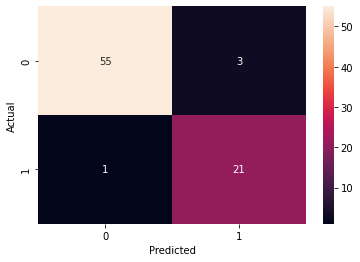

In [37]:
confusion_matrix = pd.crosstab(y_test, results, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)